In [1]:
#  Importing the libraries
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data1=data[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']]
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [4]:
# Basic informations about the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data1[data1.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY


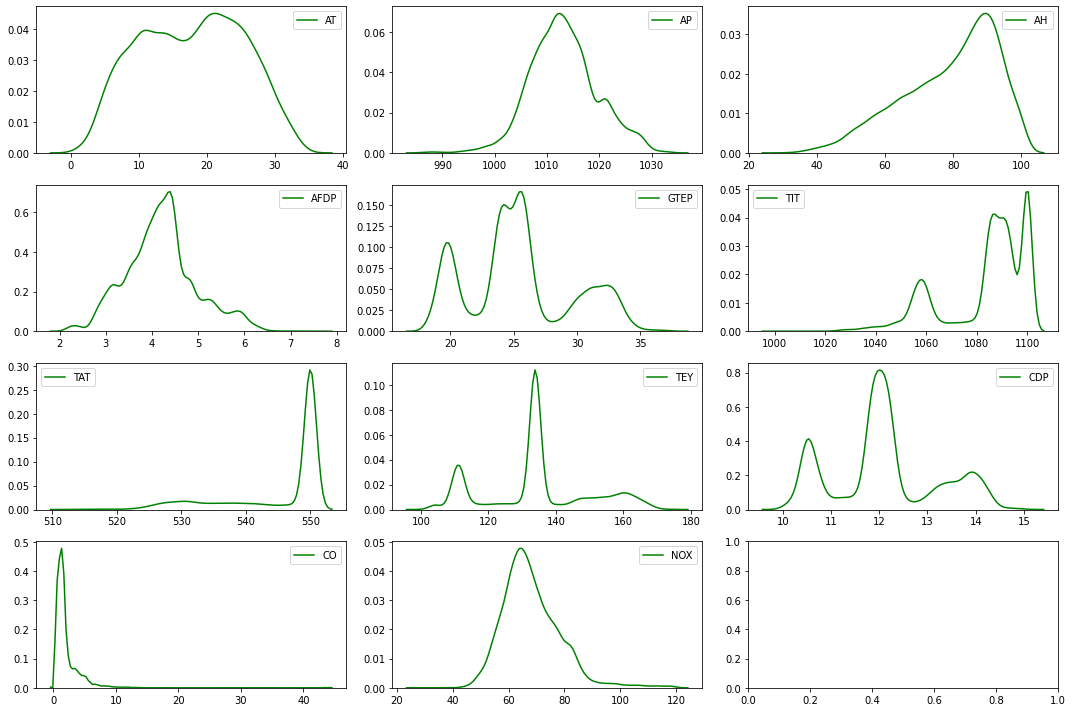

In [6]:
#  Visualization of the dataset
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.kdeplot(data1.AT, ax=ax[0,0],color='g')
sns.kdeplot(data1.AP, ax=ax[0,1],color='g')
sns.kdeplot(data1.AH, ax=ax[0,2],color='g')
sns.kdeplot(data1.AFDP, ax=ax[1,0],color='g')
sns.kdeplot(data1.GTEP, ax=ax[1,1],color='g')
sns.kdeplot(data1.TIT, ax=ax[1,2],color='g')
sns.kdeplot(data1.TAT, ax=ax[2,0],color='g')
sns.kdeplot(data1.TEY, ax=ax[2,1],color='g')
sns.kdeplot(data1.CDP, ax=ax[2,2],color='g')
sns.kdeplot(data1.CO, ax=ax[3,0],color='g')
sns.kdeplot(data1.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

In [7]:
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_data1 = LabelEncoder()
data1=data1.apply(LabelEncoder().fit_transform)
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,707,461,10695,10885
1,1199,297,12149,2207,842,293,2285,709,454,10775,10892
2,1251,301,11882,2148,883,294,2272,708,457,10746,10835
3,1334,305,11699,2138,892,296,2284,709,462,10738,10875
4,1505,310,11676,2197,871,297,2283,709,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,491,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,508,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,352,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,406,389,12579,11636


In [9]:
data1['TEY'].describe()

count    15039.00000
mean      1818.09994
std        999.24952
min          0.00000
25%       1344.50000
50%       1739.00000
75%       2191.50000
max       4206.00000
Name: TEY, dtype: float64

In [10]:
data1['TEY_New']=pd.cut(data1.TEY,bins=[0,1739,4206],labels=[0,1])
data2=data1.drop(['TEY'],axis=1)
data2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY_New
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0


In [11]:
data2.TEY_New.nunique

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY_New, Length: 15039, dtype: category
Categories (2, int64): [0 < 1]>

In [12]:
data3 = data2.values
data3

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]], dtype=int64)

In [13]:
X = data3[:,0:10]
y = data3[:,10]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

### Constructing a Sequential neural network with
### input neurons:32neurons
### hidden layer :10 neurons
### output layer:1neuron

In [15]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### Model Fitting

In [17]:
hist = model.fit(X, y,validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 10s 4ms/step - loss: 0.3747 - acc: 0.7887 - val_loss: -5382453015347200.0000 - val_acc: 0.8676
Epoch 2/150
1008/1008 [==============================] - 4s 4ms/step - loss: 0.3268 - acc: 0.8238 - val_loss: -12524097791590400.0000 - val_acc: 0.8614
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.3077 - acc: 0.8348 - val_loss: -18731103997132800.0000 - val_acc: 0.8513
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2947 - acc: 0.8430 - val_loss: -18428396849594368.0000 - val_acc: 0.8795
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2950 - acc: 0.8483 - val_loss: -13319559020806144.0000 - val_acc: 0.8884
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2822 - acc: 0.8541 - val_loss: -14593579464785920.0000 - val_acc: 0.8674
Epoch 7/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2777 - ac

1008/1008 [==============================] - 2s 2ms/step - loss: 0.2415 - acc: 0.8850 - val_loss: -57771214256472064.0000 - val_acc: 0.8586
Epoch 55/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2370 - acc: 0.8884 - val_loss: -36016706686025728.0000 - val_acc: 0.8854
Epoch 56/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2421 - acc: 0.8846 - val_loss: -60643847297826816.0000 - val_acc: 0.8862
Epoch 57/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2372 - acc: 0.8841 - val_loss: -56590961538498560.0000 - val_acc: 0.8743
Epoch 58/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2422 - acc: 0.8853 - val_loss: -48369646809645056.0000 - val_acc: 0.8904
Epoch 59/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2383 - acc: 0.8846 - val_loss: -43259945692430336.0000 - val_acc: 0.8944
Epoch 60/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2415 - acc: 0.8

1008/1008 [==============================] - 3s 3ms/step - loss: 0.2369 - acc: 0.8882 - val_loss: -66387683156426752.0000 - val_acc: 0.8805
Epoch 108/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2362 - acc: 0.8853 - val_loss: -135539787653185536.0000 - val_acc: 0.8912
Epoch 109/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2345 - acc: 0.8886 - val_loss: -123997243433811968.0000 - val_acc: 0.8769
Epoch 110/150
1008/1008 [==============================] - 3s 2ms/step - loss: 0.2368 - acc: 0.8857 - val_loss: -108759137554268160.0000 - val_acc: 0.8942
Epoch 111/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2308 - acc: 0.8934 - val_loss: -164784769727463424.0000 - val_acc: 0.8914
Epoch 112/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2327 - acc: 0.8894 - val_loss: -167042204538241024.0000 - val_acc: 0.8904
Epoch 113/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2351

### Model Evaluation

In [18]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: -72740871795113984.0000 - acc: 0.8952
acc: 89.52%


In [19]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

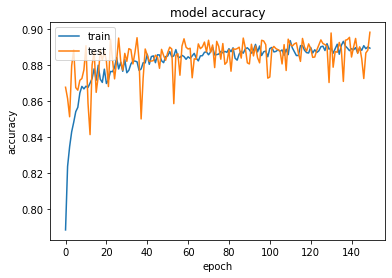

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

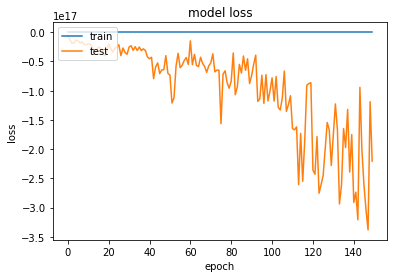

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Inference:
### The neural network helps predicting the turbine energy yield (TEY) using ambient variables as features, with the accuracy score 89% with loss -23889898738024448.0000